# Bars

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

jtplot.style(figsize=(15, 9))

In [33]:
trades = pd.read_csv('../data/order_book/BK.csv')
trades.head()

,Time,Bid,Ask,Last,Volume,Type
0,2023.03.01 20:11:44.264,50.64,50.65,50.65,100.0,Buy
1,2023.03.01 20:11:44.264,50.64,50.65,50.65,100.0,Buy
2,2023.03.01 20:11:50.317,50.64,50.65,50.65,100.0,Buy
3,2023.03.01 20:11:50.317,50.64,50.65,50.65,200.0,Buy
4,2023.03.01 20:11:50.317,50.64,50.65,50.65,100.0,Buy


In [34]:
trades['Value $'] = trades['Last'] * trades['Volume']
trades.head()

,Time,Bid,Ask,Last,Volume,Type,Value $
0,2023.03.01 20:11:44.264,50.64,50.65,50.65,100.0,Buy,5065.0
1,2023.03.01 20:11:44.264,50.64,50.65,50.65,100.0,Buy,5065.0
2,2023.03.01 20:11:50.317,50.64,50.65,50.65,100.0,Buy,5065.0
3,2023.03.01 20:11:50.317,50.64,50.65,50.65,200.0,Buy,10130.0
4,2023.03.01 20:11:50.317,50.64,50.65,50.65,100.0,Buy,5065.0


In [35]:
trades.Time = pd.to_datetime(trades.Time)
trades.set_index('Time', inplace=True)

<AxesSubplot:xlabel='Time'>

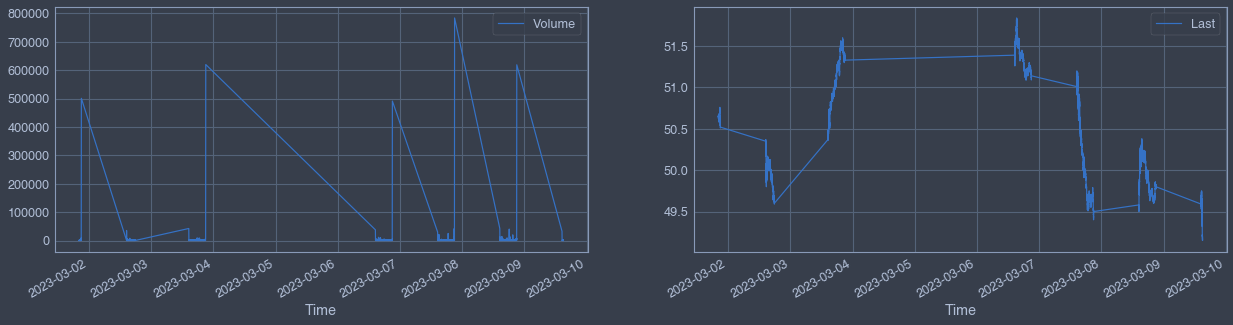

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(21, 5))
trades[['Volume']].plot(ax=ax[0])
trades[['Last']].plot(ax=ax[1])

In [38]:
mask = (trades.index > dt.datetime(2023, 3, 1, 20, 11, 0)) & (trades.index <= dt.datetime(2023, 3, 1, 21, 40, 0))
trades_mh = trades.iloc[mask]
trades_mh.head()

,Bid,Ask,Last,Volume,Type,Value $
Time,,,,,,
2023-03-01 20:11:44.264,50.64,50.65,50.65,100.0,Buy,5065.0
2023-03-01 20:11:44.264,50.64,50.65,50.65,100.0,Buy,5065.0
2023-03-01 20:11:50.317,50.64,50.65,50.65,100.0,Buy,5065.0
2023-03-01 20:11:50.317,50.64,50.65,50.65,200.0,Buy,10130.0
2023-03-01 20:11:50.317,50.64,50.65,50.65,100.0,Buy,5065.0


In [39]:
trades.loc['2023-03-01 21:00:00']

,Bid,Ask,Last,Volume,Type,Value $
Time,,,,,,
2023-03-01 21:00:00.050,50.52,50.54,50.52,600.0,Sell,30312.0


## Time Bars

In [42]:
time_bars = trades.groupby(pd.Grouper(freq='1min')).agg({'Last': 'ohlc', 'Volume': 'sum'})
time_bars_price = time_bars.loc[:, 'Last']
time_bars_price.head()

,open,high,low,close
Time,,,,
2023-03-01 20:11:00,50.65,50.66,50.65,50.66
2023-03-01 20:12:00,50.66,50.66,50.64,50.64
2023-03-01 20:13:00,50.65,50.66,50.64,50.64
2023-03-01 20:14:00,50.64,50.65,50.64,50.64
2023-03-01 20:15:00,50.64,50.64,50.62,50.62


In [43]:
time_bars.head()

Last                       Volume
                      open   high    low  close  Volume
Time                                                   
2023-03-01 20:11:00  50.65  50.66  50.65  50.66  2699.0
2023-03-01 20:12:00  50.66  50.66  50.64  50.64  4885.0
2023-03-01 20:13:00  50.65  50.66  50.64  50.64  5279.0
2023-03-01 20:14:00  50.64  50.65  50.64  50.64  4971.0
2023-03-01 20:15:00  50.64  50.64  50.62  50.62  2706.0

In [44]:
time_bars = np.log(time_bars_price.close/time_bars_price.close.shift(1)).dropna()
time_bars

Time
2023-03-01 20:12:00   -0.000395
2023-03-01 20:13:00    0.000000
2023-03-01 20:14:00    0.000000
2023-03-01 20:15:00   -0.000395
2023-03-01 20:16:00    0.000395
                         ...   
2023-03-09 14:57:00   -0.000610
2023-03-09 14:58:00    0.000000
2023-03-09 14:59:00   -0.000610
2023-03-09 15:00:00    0.000610
2023-03-09 15:01:00   -0.000610
Name: close, Length: 1838, dtype: float64

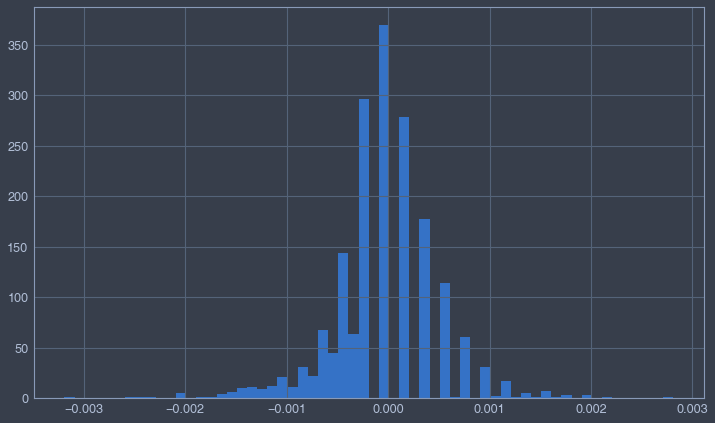

In [45]:
bin_len = 0.0001
plt.hist(time_bars, bins=np.arange(min(time_bars), max(time_bars)+bin_len, bin_len));


## Tick Bars

In [46]:
def bar(x, y):
    return np.int64(x/y)*y

In [48]:
transactions = 75
tick_bars = trades_mh.groupby(bar(np.arange(len(trades_mh)), transactions)).\
                                agg({'Last': 'ohlc', 'Volume': 'sum'})
tick_bars_price = tick_bars.loc[:, 'Last']
tick_bars_price

,open,high,low,close
0,50.65,50.66,50.64,50.64
75,50.64,50.65,50.62,50.63
150,50.64,50.67,50.64,50.67
225,50.67,50.68,50.64,50.64
300,50.65,50.65,50.62,50.62
375,50.62,50.62,50.59,50.59
450,50.60,50.61,50.59,50.59
525,50.59,50.60,50.58,50.59
600,50.59,50.61,50.59,50.61
675,50.61,50.62,50.61,50.61


In [51]:
tick_bars = np.log(tick_bars_price.close/tick_bars_price.close.shift(1)).dropna()
tick_bars

75     -0.000197
150     0.000790
225    -0.000592
300    -0.000395
375    -0.000593
450     0.000000
525     0.000000
600     0.000395
675     0.000000
750     0.000000
825    -0.000198
900     0.000395
975    -0.000198
1050    0.000198
1125    0.000395
1200    0.000197
1275    0.000592
1350    0.000000
1425    0.000592
1500   -0.000197
1575    0.000197
1650    0.000788
1725   -0.000394
1800    0.000000
1875   -0.000394
1950   -0.000394
2025   -0.000789
2100   -0.000197
2175    0.000000
2250   -0.000197
2325   -0.000593
2400    0.000000
2475    0.000000
2550   -0.000198
2625   -0.000395
2700    0.000000
2775    0.000000
2850   -0.000396
2925    0.000198
3000   -0.000396
3075    0.000198
3150    0.000198
3225   -0.000198
3300    0.000396
3375   -0.000198
3450   -0.000198
3525    0.000198
3600    0.000000
3675    0.000791
3750   -0.000395
3825   -0.000395
3900   -0.000594
3975    0.000000
4050   -0.000198
4125    0.000198
4200   -0.000198
Name: close, dtype: float64

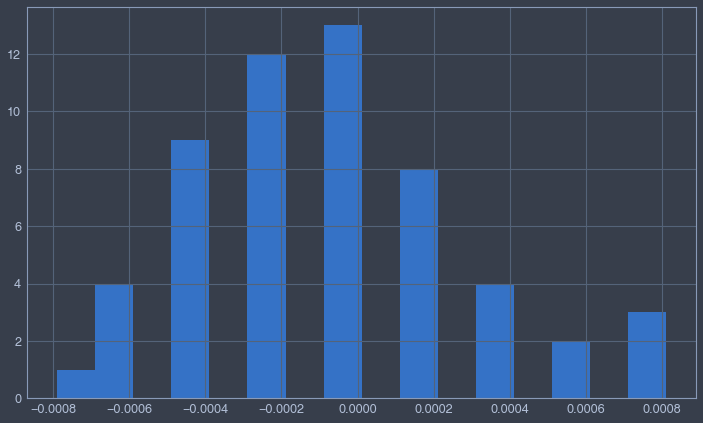

In [52]:
bin_len = 0.0001
plt.hist(tick_bars, bins=np.arange(min(tick_bars), max(tick_bars)+bin_len, bin_len))
plt.show()

## Volume Bars

In [55]:
traded_volume = 1000
volume_bars = trades_mh.groupby(bar(np.cumsum(trades_mh['Volume']), traded_volume)).\
                            agg({'Last': 'ohlc', 'Volume': 'sum'})
volume_bars_price = volume_bars.loc[:,'Last']
volume_bars_price

,open,high,low,close
0,50.65,50.65,50.65,50.65
1000,50.65,50.66,50.65,50.66
2000,50.66,50.66,50.66,50.66
3000,50.66,50.66,50.66,50.66
4000,50.66,50.66,50.65,50.65
...,...,...,...,...
782000,50.53,50.53,50.52,50.53
783000,50.53,50.53,50.53,50.53
786000,50.53,50.53,50.53,50.53
787000,50.52,50.52,50.52,50.52


In [56]:
volume_bars = np.log(volume_bars_price.close/volume_bars_price.close.shift(1)).dropna()
volume_bars

1000       0.000197
2000       0.000000
3000       0.000000
4000      -0.000197
5000       0.000000
             ...   
782000     0.000198
783000     0.000000
786000     0.000000
787000    -0.000198
1288000    0.000000
Name: close, Length: 709, dtype: float64

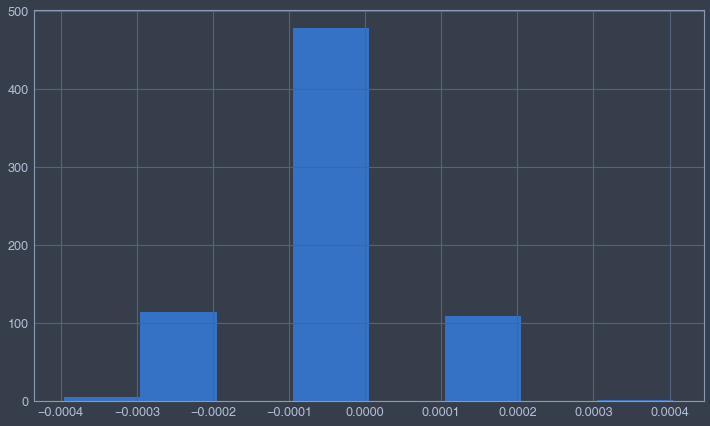

In [57]:
bin_len = 0.0001
plt.hist(volume_bars, bins=np.arange(min(volume_bars),max(volume_bars)+bin_len, bin_len))
plt.show()

## Dollar Bars

In [59]:
market_value = 70000
dollar_bars = trades_mh.groupby(bar(np.cumsum(trades_mh['Value $']), market_value)).\
                            agg({'Last': 'ohlc', 'Volume':'sum'})
dollar_bars_price = dollar_bars.loc[:,'Last']
dollar_bars_price

,open,high,low,close
0,50.65,50.66,50.65,50.66
70000,50.66,50.66,50.66,50.66
140000,50.66,50.66,50.66,50.66
210000,50.66,50.66,50.65,50.65
280000,50.65,50.65,50.65,50.65
...,...,...,...,...
39550000,50.52,50.53,50.52,50.53
39620000,50.53,50.53,50.53,50.53
39760000,50.53,50.53,50.53,50.53
39830000,50.52,50.52,50.52,50.52


In [60]:
dollar_bars = np.log(dollar_bars_price.close/dollar_bars_price.close.shift(1)).dropna()
dollar_bars

70000       0.000000
140000      0.000000
210000     -0.000197
280000      0.000000
350000     -0.000197
              ...   
39550000    0.000198
39620000    0.000000
39760000    0.000000
39830000   -0.000198
65100000    0.000000
Name: close, Length: 540, dtype: float64

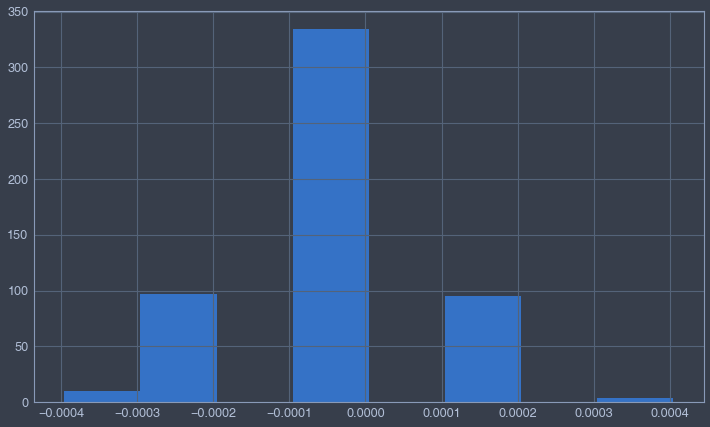

In [64]:
bin_len = 0.0001
plt.hist(dollar_bars, bins=np.arange(min(dollar_bars),max(dollar_bars)+bin_len, bin_len))
plt.show()